In [1]:
import pandas as pd
from pysb import *
from pysb.macros import bind
from pysb.macros import degrade
import pysb.pkpd as pkpd
from pysb.simulator import ScipyOdeSimulator
import numpy as np
import matplotlib.pyplot as plt


## Compartmental Models in Pharmacokinetics: A Concise Summary

Pharmacokinetics describes how drugs move through the body. One way to analyze this movement is with compartmental models, which imagine the body as a series of interconnected compartments. Each compartment represents a group of tissues with similar drug distribution properties.

**Different models for different complexities:**

* **One-compartment model:** Simplest model, assuming the drug distributes quickly and uniformly throughout the body (e.g., water-soluble drugs).
* **Two-compartment model:** Splits the body into a central compartment (blood and well-perfused organs) and a peripheral compartment (less perfused tissues). Useful for drugs that take longer to reach certain tissues.
* **Three-compartment model:** Adds a second peripheral compartment for drugs with multiple distribution phases or slower penetration into certain tissues.

**Key points to remember:**

* Compartments are theoretical constructs for studying drug distribution, not actual anatomical units.
* Choosing the right model depends on the drug's distribution properties and plasma concentration-time profile.
* Some models include an "Effect compartment" to link drug concentration with its actual effects.
* More complex models, like PBPK, use many compartments to represent detailed tissue-specific distribution.


### PK Concept

1. **Dose/Dosage**: 
   - _Dose_ refers to the amount of drug administered at a specific time.
   - _Dosage_ is about multiple doses taken over time with a set frequency.
   - The route of administration (e.g., oral vs. intravenous) is vital in determining the appropriate dose or dosage.

2. **Bioavailability ($\beta$)**: 
   - Represents the fraction of a drug dose that gets absorbed and reaches the action site.
   - Particularly relevant for oral administration, where not all the drug enters the circulation.

3. **Volume of Distribution ($V_d$)**: 
   - A theoretical volume in which a drug is distributed to yield a measured plasma concentration.
   - Provides insights into whether a drug stays in plasma or disperses into tissues.
   - Not a fixed value and varies depending on the compartment model used.

4. **Elimination**: 
   - The process of removing the drug from the body, typically through metabolism and excretion.
   - Often modeled as a linear process with first-order kinetics.

5. **Clearance (CL)**: 
   - Defined as the volume of plasma cleared of the drug per unit time.
   - Can also be expressed as the rate of drug elimination divided by the drug's plasma concentration.
   - In compartmental models, clearance is linked with a first-order rate constant.

### PD Functions:

1. **Emax**: 
   - Relates drug concentration to effect using a non-linear sigmoid function.
   - Described as $E = E_{max} \left[Drug\right] / (\left[Drug\right] + EC_{50})$, where $E_{max}$ is the maximum effect and $EC_{50}$ is the half-maximum concentration.
   - Can include a baseline effect, modifying the equation accordingly.

2. **Sigmoidal Emax**: 
   - A generalized form of the Emax function.
   - Expressed as $E = E_{max} \left[Drug\right]^n / (\left[Drug\right]^n + EC_{50}^n)$, with $n$ being the Hill slope.
   - Can also account for a baseline effect.

Other PD functions include:
   
- **Linear Effect Model**: Direct linear relationship between drug concentration and effect.
- **Log-linear Effect Model**: Effect varies linearly with the logarithm of drug concentration.
- **Fixed-Effect Model**: Fixed effect magnitude occurring beyond a certain drug concentration threshold.

PD-1, short for Programmed Death-1, is a protein that plays a significant role in regulating the immune system's response to cells in the human body. It is a type of protein known as a checkpoint protein, which is found on the surface of certain immune cells called T cells. 

### Function:
PD-1 acts as an immune checkpoint, meaning it is crucial in preventing the immune system from attacking normal cells in the body. It does this by delivering inhibitory signals to the T cells when it binds to its ligands (PD-L1 or PD-L2), which are often found on the surface of healthy cells. This interaction effectively tells the T cells to ignore the normal, healthy cells, thus preventing an autoimmune response.

### Clinical Significance:
1. **Cancer Therapy**: Many cancer cells express PD-L1, the ligand for PD-1, allowing them to evade the immune system by inhibiting T cell function. This has led to the development of PD-1 inhibitors, a class of drugs called immune checkpoint inhibitors, used in cancer immunotherapy. These drugs block PD-1, preventing it from binding to PD-L1 on cancer cells, thereby enabling the immune system to recognize and destroy these cancer cells.

2. **Autoimmune Diseases**: Since PD-1 plays a role in preventing autoimmune reactions, it is also of interest in the study and treatment of autoimmune diseases. Alterations in the PD-1 pathway can contribute to the development of autoimmune disorders.

### Examples of PD-1 Inhibitors:
- Pembrolizumab (Keytruda)
- Nivolumab (Opdivo)

These inhibitors have been successful in treating various types of cancer, including melanoma, non-small cell lung cancer, and more, by enhancing the immune system's ability to fight cancer.

## Summary of the case study on Pembrolizumab (Pembro) and its target occupancy modeling:
[Study on Pembrolizumab (Pembro) and Target Occupancy](https://info.appliedbiomath.com/hubfs/Case%20Studies/Applied%20BioMath_Inferring%20TO_Pembro_Case%20Study.pdf)
### Background
- **Drug**: Pembrolizumab (Pembro), an anti-PD-1 antibody.
- **Indications**: Approved for various cancer treatments.
- **Dosage**: Administered as 200 mg or 2 mg/kg intravenously every three weeks (Q3W).
- **Challenge**: Determining the percent target receptor occupancy (RO) for PD-1, which is difficult through direct experimental measurements.

### Results
- **Model Development**: A semi-mechanistic Pharmacokinetic Receptor Occupancy (PKRO) model was created to fit phase 1 PK data of Pembro.
- **RO Predictions**: The model predicted that varying the concentration of soluble PD-1 (sPD-1) does not significantly affect PD-1 RO in the tumor for the clinically approved dose of 2 mg/kg Q3W.
- **Parameter Sensitivity**: Exploring the impact of Kd (dissociation constant) and the drug:PD-1 turnover rate. The model remained robust (> 90% RO) even when these parameters varied by 10-fold.

### Model Diagram and Mechanics
- **Compartments**: The Quantitative Systems Pharmacology (QSP) model incorporated three compartments - tumor, circulation (Central), and other organs/tissues (Peripheral).
- **Mechanisms**:
  1. Binding of the drug to PD-1 and sPD-1.
  2. PD-1 receptor turnover.
  3. Internalization and clearance of the drug:PD-1 complex.
  4. Clearance of free drug and drug:sPD-1 complex.
- **PD-L1 Expression**: Limited to the tumor compartment.

### Conclusion
- **PD-1 Expression**: Predicted to be around 10.8 pM in circulation without soluble PD-1. Higher expression is predicted in the presence of sPD-1, reflecting non-linear PK.
- **RO Predictions**: 
  - For 2 mg/kg IV Q3W dosing, Pembro showed > 98% RO in the tumor compartment across different sPD-1 concentrations.
  - Variations in Kd or the half-life of the mAb-PD1 complex did not significantly impact the high level of PD-1 occupancy (> 90% at steady state) with the standard 2 mg/kg Q3W dose. 

This model serves as an important tool for dose selection in anti-PD-1 combination studies and the development of other anti-PD-1 drugs.

In [2]:
Model(name='pembro_pd')

<Model 'pembro_pd' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0, energypatterns: 0) at 0x1610d8850>

In [3]:
pkpd.three_compartments(c3_name='TUMOR')

ComponentSet([
 Compartment(name='CENTRAL', parent=None, dimension=3, size=V_CENTRAL),
 Compartment(name='PERIPHERAL', parent=None, dimension=3, size=V_PERIPHERAL),
 Compartment(name='TUMOR', parent=None, dimension=3, size=V_TUMOR),
 Parameter('V_CENTRAL', 1.0),
 Parameter('V_PERIPHERAL', 1.0),
 Parameter('V_TUMOR', 1.0),
 ])

In PySB, a monomer is a basic building block used to model a molecule, typically a protein or a drug. Monomers can have binding sites that allow them to interact with other monomers, forming complexes.

In [4]:
Monomer("Pembro", ['b'])

Monomer('Pembro', ['b'])

In [5]:
Monomer("PD1", ['b'])

Monomer('PD1', ['b'])

In [6]:
Monomer("sPD1", ['b'])

Monomer('sPD1', ['b'])

In [7]:
Monomer("PDL1", ['b'])

Monomer('PDL1', ['b'])

pkpd.distribute is a function provided by the PySB pkpd extension. This function is used to model the reversible transfer of a substance (like a drug) between two different compartments in a PK/PD model.

In [8]:
pkpd.distribute(Pembro(b=None), CENTRAL, PERIPHERAL, [5e-5, 1e-3])
pkpd.eliminate(Pembro(b=WILD), CENTRAL, 3e-6) 
pkpd.distribute(Pembro(b=None), CENTRAL, TUMOR, [2e-6, 6e-5])

ComponentSet([
 Rule('distribute_Pembro_CENTRAL_to_TUMOR', Pembro(b=None) ** CENTRAL | Pembro(b=None) ** TUMOR, distribute_Pembro_CENTRAL_to_TUMOR_kf, distribute_Pembro_CENTRAL_to_TUMOR_kr),
 Parameter('distribute_Pembro_CENTRAL_to_TUMOR_kf', 2e-06),
 Parameter('distribute_Pembro_CENTRAL_to_TUMOR_kr', 6e-05),
 ])

 **Arguments of the `bind` Function:**
   - `Pembro`: This is the first monomer in the binding interaction, representing Pembrolizumab. It has a binding site labeled 'b'.
   - `'b'`: This is the name of the binding site on Pembrolizumab where the interaction will occur.
   - `PD1`: The second monomer, representing the PD1 receptor, which Pembrolizumab will bind to. It also has a binding site named 'b'.
   - `'b'`: This is the name of the binding site on the PD1 receptor.
   - `[5e-4, 8e-3]`: These are the kinetic rate constants for the binding interaction. The first value (`5e-4`) is the forward rate constant for the binding of Pembro to PD1, and the second value (`8e-3`) is the reverse rate constant for the dissociation of the Pembro-PD1 complex.

In [9]:
bind(Pembro, 'b', PD1, 'b', [5e-4, 8e-3])
bind(Pembro, 'b', sPD1, 'b', [5e-4, 8e-3])
bind(PD1(b=None)**TUMOR, 'b', PDL1(b=None)**TUMOR, 'b', [1e-7, 1e-2])

ComponentSet([
 Rule('bind_PD1_PDL1', PD1(b=None) ** TUMOR + PDL1(b=None) ** TUMOR | PD1(b=1) ** TUMOR % PDL1(b=1) ** TUMOR, bind_PD1_PDL1_kf, bind_PD1_PDL1_kr),
 Parameter('bind_PD1_PDL1_kf', 1e-07),
 Parameter('bind_PD1_PDL1_kr', 0.01),
 ])

In [12]:
pd1_all = (PD1(b=None)**CENTRAL + PD1(b=None)**PERIPHERAL + PD1(b=None)**TUMOR)

In [13]:
#zero-order rate constant for the synthesis of PD1 protein
Parameter("k_PD1_synth", 3e-6)
#rule for the synthesis of PD1 protein
Rule("PD1_synth", None >> pd1_all, k_PD1_synth)

Rule('PD1_synth', None >> PD1(b=None) ** CENTRAL + PD1(b=None) ** PERIPHERAL + PD1(b=None) ** TUMOR, k_PD1_synth)

In [14]:
degrade(PD1(b=WILD), 3e-6)

ComponentSet([
 Rule('degrade_PD1WILD', PD1(b=WILD) >> None, degrade_PD1WILD_k),
 Parameter('degrade_PD1WILD_k', 3e-06),
 ])

In [16]:
pkpd.dose_absorbed
pkpd.dose_absorbed(Pembro(b=None), CENTRAL, 2000.0, 3e-3, 1.0)

ComponentSet([
 Rule('absorb_Pembro_CENTRAL', Pembro_CENTRAL_precursor() ** CENTRAL >> Pembro(b=None) ** CENTRAL, absorb_Pembro_CENTRAL_ka),
 Parameter('absorb_Pembro_CENTRAL_ka', 0.003),
 Parameter('dose_Pembro_CENTRAL', 2000.0),
 Expression('expr_Pembro_CENTRAL_dose', dose_Pembro_CENTRAL/V_CENTRAL),
 Parameter('ka_Pembro_CENTRAL', 0.003),
 Parameter('F_Pembro_CENTRAL', 1.0),
 Monomer('Pembro_CENTRAL_precursor'),
 ])

In [17]:
Parameter('PD1_CP0', 0.1)
Initial(PD1(b=None)**CENTRAL, PD1_CP0)
Initial(PD1(b=None)**PERIPHERAL, PD1_CP0)
Parameter('PD1_T0', 0.083)
Initial(PD1(b=None)**TUMOR, PD1_T0)

Parameter('sPD1_0', 0.0415)
Initial(sPD1(b=None)**CENTRAL, sPD1_0)
Initial(sPD1(b=None)**PERIPHERAL, sPD1_0)
Initial(sPD1(b=None)**TUMOR, sPD1_0)

Parameter('PDL1_0', 0.010)
Initial(PDL1(b=None)**TUMOR, PDL1_0)

Observable("Pembro_PD1_TUMOR", Pembro(b=ANY)**TUMOR % PD1(b=ANY)**TUMOR)
Observable("PD1_TUMOR", PD1(b=WILD)**TUMOR)
Expression("RO_TUMOR", 100 * Pembro_PD1_TUMOR / PD1_TUMOR) 
Observable("Pembro_CENTRAL", Pembro(b=WILD)**CENTRAL)
Observable("Pembro_TUMOR", Pembro(b=WILD)**TUMOR)
Observable("Pembro_PERIPHERAL", Pembro(b=WILD)**PERIPHERAL)

Observable('Pembro_PERIPHERAL', Pembro(b=WILD) ** PERIPHERAL)

In [18]:
sim = ScipyOdeSimulator(pembro_pd)
tspan = np.arange(0, 86400 * 8, 10)

ld: warning: duplicate -rpath '/Users/tbin/anaconda3/envs/explore/lib' ignored


In [19]:
out = sim.run(tspan=tspan).all

In [20]:
out['Pembro_CENTRAL']

array([  0.        ,  59.09265255, 116.40667235, ..., 271.38325107,
       271.37572316, 271.36819546])

In [28]:
df_out=pd.DataFrame(out)

In [33]:
df_out.columns

Index(['__s0', '__s1', '__s2', '__s3', '__s4', '__s5', '__s6', '__s7', '__s8',
       '__s9', '__s10', '__s11', '__s12', '__s13', '__s14', '__s15', '__s16',
       '__s17', 'Pembro_PD1_TUMOR', 'PD1_TUMOR', 'Pembro_CENTRAL',
       'Pembro_TUMOR', 'Pembro_PERIPHERAL', 'RO_TUMOR'],
      dtype='object')

In [ ]:
df_out['']

In [32]:
len(tspan / 86400)

69120

In [29]:
df_out.columns

Index(['__s0', '__s1', '__s2', '__s3', '__s4', '__s5', '__s6', '__s7', '__s8',
       '__s9', '__s10', '__s11', '__s12', '__s13', '__s14', '__s15', '__s16',
       '__s17', 'Pembro_PD1_TUMOR', 'PD1_TUMOR', 'Pembro_CENTRAL',
       'Pembro_TUMOR', 'Pembro_PERIPHERAL', 'RO_TUMOR'],
      dtype='object')

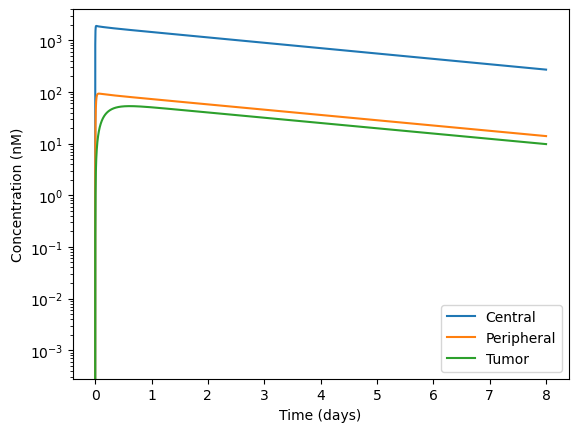

In [21]:
tspan_day = tspan / 86400
plt.plot(tspan_day, out['Pembro_CENTRAL'], label='Central')
plt.plot(tspan_day, out['Pembro_PERIPHERAL'], label='Peripheral')
plt.plot(tspan_day, out['Pembro_TUMOR'], label='Tumor')
plt.xlabel("Time (days)")
plt.ylabel("Concentration (nM)")
plt.legend(loc=0)
plt.yscale('log')

https://www.mathworks.com/help/simbio/ug/generate-virtual-population.html#VirtualPatientsSimBiologyModelAnalyzerExample-6